In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import xlsxwriter
from tabulate import tabulate
import seaborn as sns

#from google.colab import drive
#from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer
# Required Libraries
import os


In [2]:
dataset = pd.DataFrame()
file = pd.ExcelFile('data\C_DADOS_BZF.xlsx')
sheets_list = ['Produção', 'Industria', 'Descrição']
for sheet in sheets_list:
    if 'Descrição' != sheet:
        temp_df = pd.read_excel(file, sheet_name=sheet)
        dataset = pd.concat([dataset, temp_df])
first_list = temp_df.columns.tolist()
temp_df = dataset.reset_index(drop=True)
#dataset.head()
len(dataset)

4504

In [3]:
xls = pd.ExcelFile('data\C_DADOS_BZF.xlsx')
prod= pd.read_excel(xls, 'Produção')
ind= pd.read_excel(xls, 'Industria')

In [4]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID Lote                          1970 non-null   int64         
 1   Unidade                          1970 non-null   object        
 2   Tanque                           1970 non-null   object        
 3   Fase                             1970 non-null   object        
 4   Tamanho                          1970 non-null   object        
 5   Lote                             1970 non-null   object        
 6    nº Dias                         1970 non-null   int64         
 7   Peso Médio Inicial               1970 non-null   float64       
 8    Data Entrada                    1970 non-null   datetime64[ns]
 9    Data Encerramento               1970 non-null   object        
 10   Saldo                           1970 non-null   int64      

In [5]:
for col in prod.columns:
    print(col)

ID Lote
Unidade
Tanque
Fase
Tamanho
Lote
 nº Dias
Peso Médio Inicial
 Data Entrada
 Data Encerramento
 Saldo
 Quantidade Inicial
 Mortalidade
 Mortalidade Coletada
 Sobrevivência
 Saldo Final
 Outras Saídas
 Curva
 Peso Médio Saída
 Peso Médio Entrada 
Biomassa Final
 Biomassa Inicial
Biomassa Ganha
Status
Data Despesca
 Peso Médio Despesca
 Biomassa Despesca
 Espécie
 Tipo Tanque
 GPD Fase
GPD Real
 Peso Médio Atual
 Biomassa Atual
 Peso Médio Biometria
 Biomassa Biometria
 Densidade Máxima
 Metragem Tanque
 Conversão Alimentar
 Conversão Acumulada
 Custo Total Entrada (Biomassa)
 Custo Total Entrada (Peixe)
 Custo Entrada/Kg
 Custo Entrada/Unidades
Custo Ração
 Custo Insumos
 Custo Alevinos
Custo Indireto
Custos Totais (Peixe)
Custos Totais (Biomassa)
Custo/Kg
Custo/Peixe
Últ. Biometria
Peso Médio Últ. Biometria
Peso Estimado Biometria
Densidade
Ração Nominal
Ração Real
 % Nominal/Real
 Linha
 Sequência
 Produto Origem
Fornecedor Origem
 Data Povoamento


In [6]:
for col in ind.columns:
    print(col)

Número do lote
Número do tanque
Data
Número de animais
Peso ao abate
Rendimento de filé
Custo logística
% homogeneidade
Custo/ kg filé
Receita/kg filé
% descarte
Preço de venda/kg
Lucro


In [7]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Número do lote      2534 non-null   object        
 1   Número do tanque    0 non-null      float64       
 2   Data                2534 non-null   datetime64[ns]
 3   Número de animais   2534 non-null   int64         
 4   Peso ao abate       2534 non-null   float64       
 5   Rendimento de filé  2534 non-null   float64       
 6   Custo logística     0 non-null      float64       
 7   % homogeneidade     0 non-null      float64       
 8   Custo/ kg filé      2534 non-null   float64       
 9   Receita/kg filé     2534 non-null   float64       
 10  % descarte          2534 non-null   float64       
 11  Preço de venda/kg   2534 non-null   float64       
 12  Lucro               2534 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1), obj

In [8]:
prod.describe()

,ID Lote,nº Dias,Peso Médio Inicial,Saldo,Quantidade Inicial,Mortalidade,Mortalidade Coletada,Sobrevivência,Saldo Final,Outras Saídas,...,Custos Totais (Biomassa),Custo/Kg,Custo/Peixe,Peso Médio Últ. Biometria,Peso Estimado Biometria,Densidade,Ração Nominal,Ração Real,% Nominal/Real,Sequência
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.0,...,1944.000000,1944.000000,1944.000000,250.00000,248.000000,267.000000,1950.000000,1944.000000,1944.000000,1970.000000
mean,12028.802030,61.274112,186.776182,1101.360406,9925.903553,1261.706091,439.596954,90.758724,7776.413706,0.0,...,20952.615508,5.695674,2.803107,750.82780,1248.282805,34.587135,4265.515296,4093.698176,90.862037,8.776142
std,2958.463803,28.137459,170.384487,2894.039886,4847.708295,1985.653598,723.588693,17.701486,5303.292947,0.0,...,14347.713385,1.344970,1.959483,288.96979,494.578239,12.338476,2742.098912,2970.609006,15.237869,7.453812
min,7201.000000,0.000000,11.000000,0.000000,886.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,27.150000,0.042338,0.002975,52.95000,51.714286,0.585393,2.130830,6.000000,8.218430,0.000000
25%,8841.500000,42.000000,40.025000,0.000000,8042.000000,103.250000,58.000000,82.888889,5546.000000,0.0,...,10151.839715,5.009704,1.425976,592.25000,764.250000,27.980495,2289.948608,1956.514731,82.359245,1.000000
50%,12794.500000,62.000000,98.000000,0.000000,8109.000000,501.500000,185.500000,94.452426,7405.000000,0.0,...,15761.359563,5.560850,2.287665,854.50000,1381.310714,36.251552,3816.136112,3487.241569,92.043059,8.000000
75%,14554.500000,79.000000,350.000000,0.000000,9032.750000,1504.500000,523.000000,99.962553,8684.500000,0.0,...,31221.820338,6.369581,4.273909,966.00000,1582.108929,42.333742,6081.454130,5961.781057,100.470673,15.000000
max,16349.000000,172.000000,1080.000000,21663.000000,27825.000000,14090.000000,7095.000000,260.233333,36485.000000,0.0,...,66969.591318,11.543820,11.555217,1144.00000,2555.907143,62.388683,13022.443541,13950.959383,151.841120,27.000000


In [9]:
prod_desc = prod.describe()
prod.describe()

,ID Lote,nº Dias,Peso Médio Inicial,Saldo,Quantidade Inicial,Mortalidade,Mortalidade Coletada,Sobrevivência,Saldo Final,Outras Saídas,...,Custos Totais (Biomassa),Custo/Kg,Custo/Peixe,Peso Médio Últ. Biometria,Peso Estimado Biometria,Densidade,Ração Nominal,Ração Real,% Nominal/Real,Sequência
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.0,...,1944.000000,1944.000000,1944.000000,250.00000,248.000000,267.000000,1950.000000,1944.000000,1944.000000,1970.000000
mean,12028.802030,61.274112,186.776182,1101.360406,9925.903553,1261.706091,439.596954,90.758724,7776.413706,0.0,...,20952.615508,5.695674,2.803107,750.82780,1248.282805,34.587135,4265.515296,4093.698176,90.862037,8.776142
std,2958.463803,28.137459,170.384487,2894.039886,4847.708295,1985.653598,723.588693,17.701486,5303.292947,0.0,...,14347.713385,1.344970,1.959483,288.96979,494.578239,12.338476,2742.098912,2970.609006,15.237869,7.453812
min,7201.000000,0.000000,11.000000,0.000000,886.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,27.150000,0.042338,0.002975,52.95000,51.714286,0.585393,2.130830,6.000000,8.218430,0.000000
25%,8841.500000,42.000000,40.025000,0.000000,8042.000000,103.250000,58.000000,82.888889,5546.000000,0.0,...,10151.839715,5.009704,1.425976,592.25000,764.250000,27.980495,2289.948608,1956.514731,82.359245,1.000000
50%,12794.500000,62.000000,98.000000,0.000000,8109.000000,501.500000,185.500000,94.452426,7405.000000,0.0,...,15761.359563,5.560850,2.287665,854.50000,1381.310714,36.251552,3816.136112,3487.241569,92.043059,8.000000
75%,14554.500000,79.000000,350.000000,0.000000,9032.750000,1504.500000,523.000000,99.962553,8684.500000,0.0,...,31221.820338,6.369581,4.273909,966.00000,1582.108929,42.333742,6081.454130,5961.781057,100.470673,15.000000
max,16349.000000,172.000000,1080.000000,21663.000000,27825.000000,14090.000000,7095.000000,260.233333,36485.000000,0.0,...,66969.591318,11.543820,11.555217,1144.00000,2555.907143,62.388683,13022.443541,13950.959383,151.841120,27.000000


In [10]:
dados = prod_desc.copy()

tabela = tabulate(dados, headers="firstrow", tablefmt="sheet")

dados.to_excel('data/prod_describe.xlsx', index = False)

In [11]:
ind_desc = ind.describe()
ind.describe()

,Número do tanque,Número de animais,Peso ao abate,Rendimento de filé,Custo logística,% homogeneidade,Custo/ kg filé,Receita/kg filé,% descarte,Preço de venda/kg,Lucro
count,0.0,2534.000000,2534.000000,2534.000000,0.0,0.0,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,NaN,12632.842936,12053.255452,0.272304,NaN,NaN,17.004281,27.201867,0.000850,32.631291,10.197585
std,NaN,10894.890956,9576.597956,0.126557,NaN,NaN,8.561550,3.462400,0.002033,3.785327,9.172524
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,24.190000,0.000000,24.193988,-4.223593
25%,NaN,5297.750000,5000.000000,0.311133,NaN,NaN,16.085298,25.700000,0.000000,31.684364,3.479675
50%,NaN,7407.000000,7000.000000,0.331769,NaN,NaN,18.185781,26.120000,0.000000,32.509313,8.330859
75%,NaN,22210.250000,21000.000000,0.338477,NaN,NaN,23.478757,26.860000,0.000902,33.931882,11.684588
max,NaN,48235.000000,41000.000000,0.368648,NaN,NaN,33.003593,40.550000,0.037502,40.546452,40.550000


In [12]:
dados = ind_desc.copy()

tabela = tabulate(dados, headers="firstrow", tablefmt="sheet")

dados.to_excel('data/ind_describe.xlsx', index = False)

In [13]:
#data[['Pclass','Sex']].value_counts()
#data.sort_values(by='Age',ascending=False)



In [14]:
#data.groupby(['Sex'])['Age'].agg(['max','min','mean','median'])


C:\Users\crist\AppData\Local\Temp\ipykernel_9064\561135344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(prod.corr(),


<Axes: >

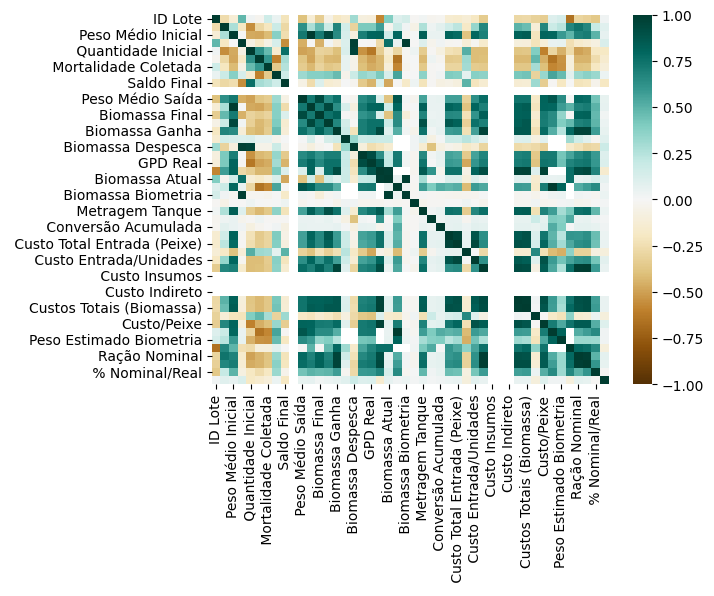

In [15]:
sns.heatmap(prod.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')

In [16]:
ind_new = ind.drop(columns=['Número de animais',
 'Número do tanque',
 'Custo logística',
 '% homogeneidade'])

ind_new.head()

,Número do lote,Data,Peso ao abate,Rendimento de filé,Custo/ kg filé,Receita/kg filé,% descarte,Preço de venda/kg,Lucro
0,2437,2020-01-03,8692.0,0.306567,15.494175,24.19,0.001453,24.193988,8.695825
1,2438,2020-01-03,18570.0,0.313197,15.166195,24.19,0.000000,24.193988,9.023805
2,2439,2020-01-04,8658.0,0.303827,15.633901,24.19,0.001216,24.193988,8.556099
3,2440,2020-01-04,16630.0,0.305369,15.554965,24.19,0.000633,24.193988,8.635035
4,2441,2020-01-06,27021.0,0.308794,15.382443,24.19,0.000584,24.193988,8.807557


C:\Users\crist\AppData\Local\Temp\ipykernel_9064\149823153.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ind_new.corr(),


<Axes: >

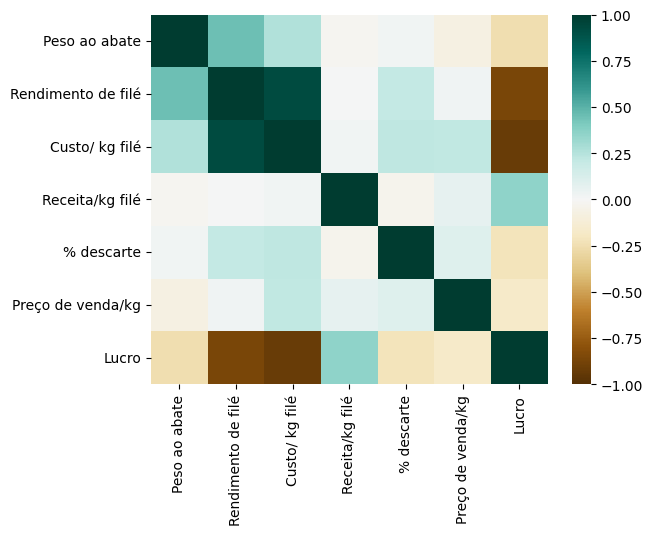

In [17]:
sns.heatmap(ind_new.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')

In [21]:
ind_new1 = ind_new.drop(columns=['Peso ao abate', 'Data'])

ind_new1.head()

,Número do lote,Rendimento de filé,Custo/ kg filé,Receita/kg filé,% descarte,Preço de venda/kg,Lucro
0,2437,0.306567,15.494175,24.19,0.001453,24.193988,8.695825
1,2438,0.313197,15.166195,24.19,0.000000,24.193988,9.023805
2,2439,0.303827,15.633901,24.19,0.001216,24.193988,8.556099
3,2440,0.305369,15.554965,24.19,0.000633,24.193988,8.635035
4,2441,0.308794,15.382443,24.19,0.000584,24.193988,8.807557


<Axes: >

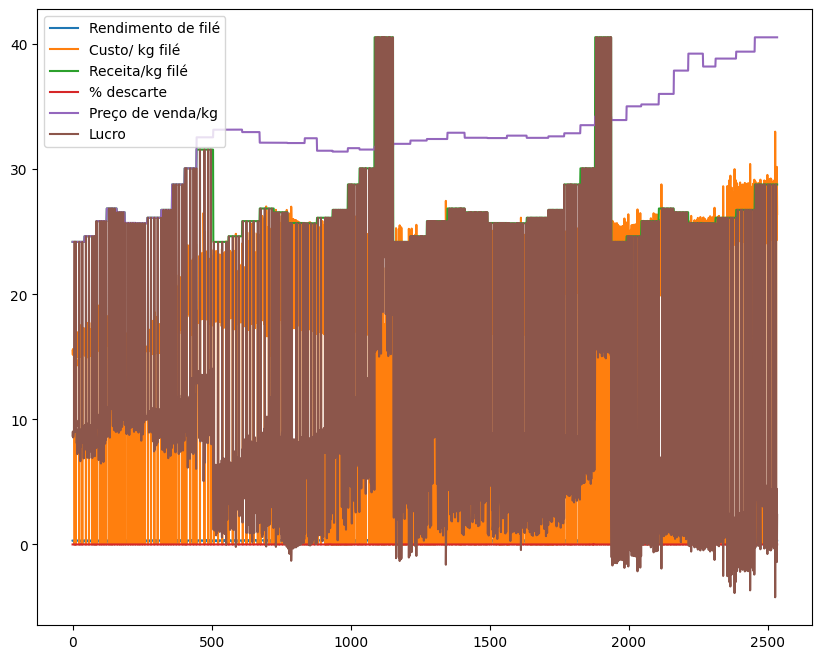

In [22]:
ind_new1.plot(figsize = (10,8))